# Problem 1: Clustering

## 1.1 Read the data, do the necessary initial steps, and exploratory data analysis.(Univariate, Bi-variate, and multivariate analysis).

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


### Reading the data

In [2]:
bank_df= pd.read_csv("bank_marketing_part1_Data.csv")

In [3]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
bank_df.duplicated().sum()

0

In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


#### Reading the data
* No duplicate rows are present
* There are 210 rows and 7 columns in dataset.
* The data type for each parameter is float type.
* No null value present in dataset.




### Exploratory Data Analysis

#### Univariate Analysis

##### Summary Stats

In [6]:
bank_df. describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


* Following pairs have relatively similar statistical parameters.
  * "spending" and "advance_payments"
  * "current_balance" and "max_spent_in_single_shopping"
* Mean and standard deviation of the parameter " probability_of_full_payment" is comparably too low as compared to other parameters.


##### Getting box plots 

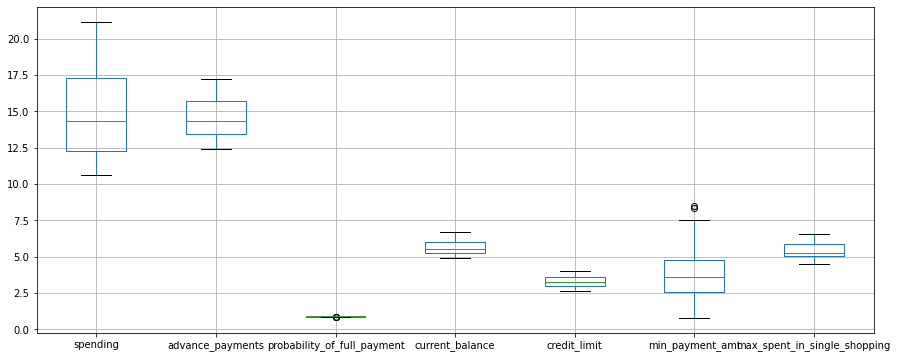

In [7]:
plt.figure(figsize=(15,6))
bank_df.boxplot()

##### Following variables have outliers;
* probability_of_full_payment
* min_payment_amt

In [9]:
bank_df.skew()

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

* ALL the variables are right skewed except "probability_of_full_payment  "

#### Bivariate/Multivariate analysis

##### Getting Pairplots

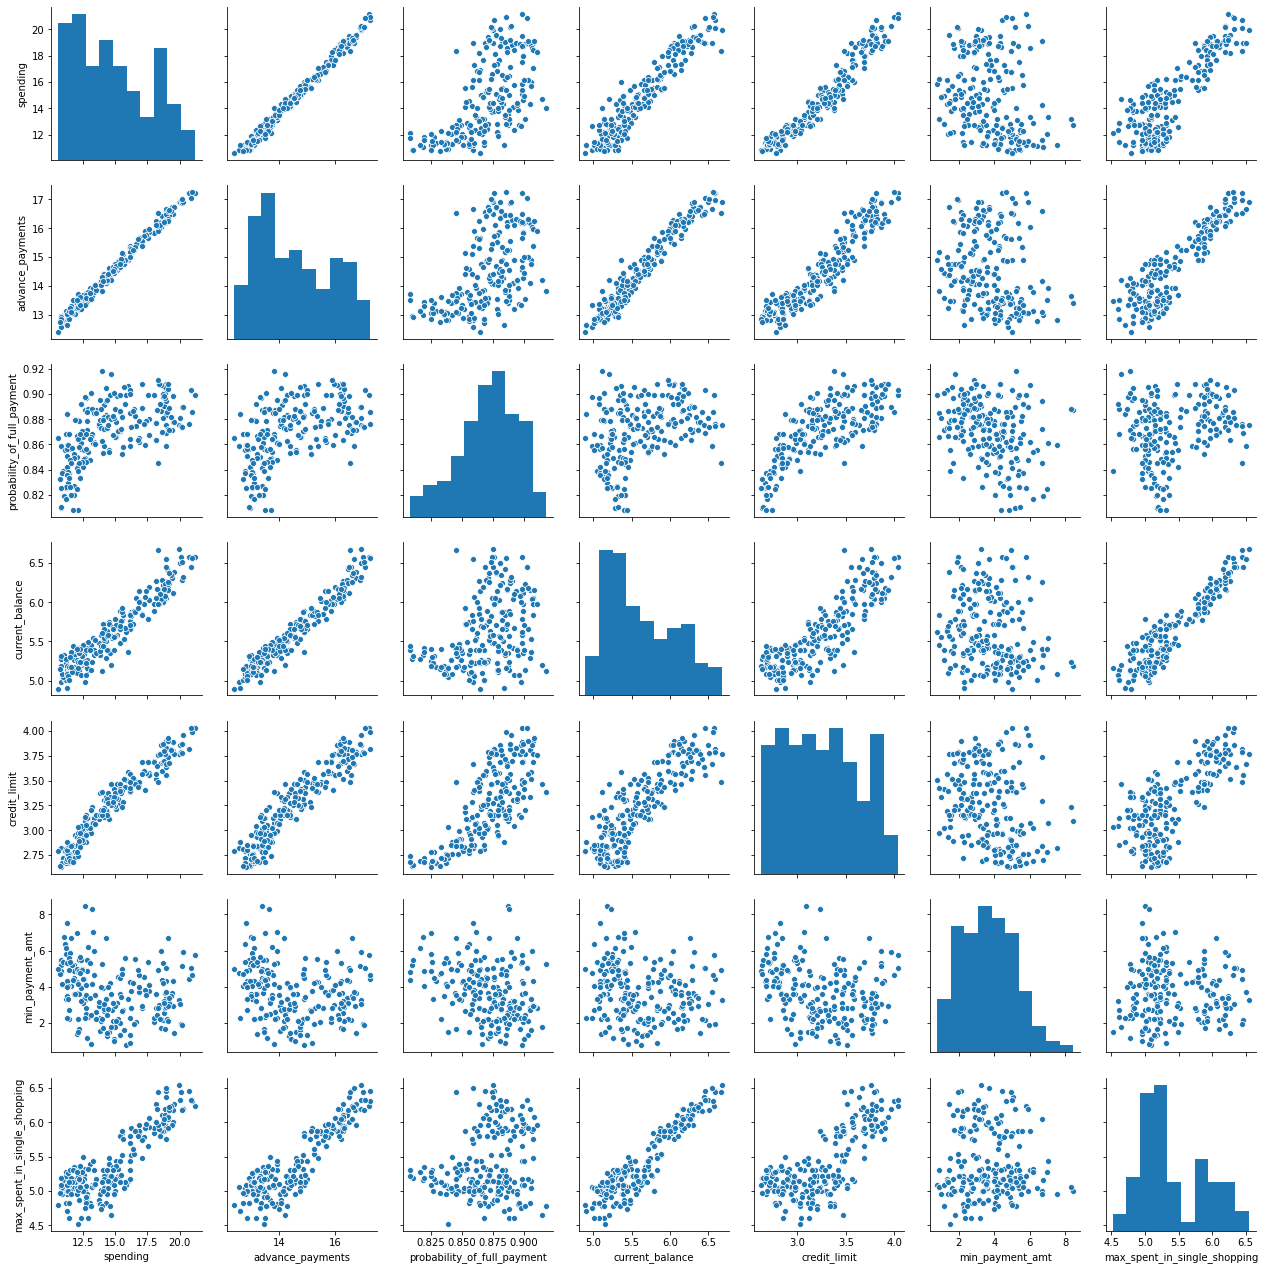

In [10]:
sns.pairplot(bank_df)

##### From above plots we can interpret that;
* 'spending' seems to have some relation with nearly all parameters except 'min_payment_amt'
* 'advance_payments' seems to have some relation with nearly all parameters except 'min_payment_amt'
* 'probability_of_full_payment'seems to have some relation with 'credit_limit'
* 'current_balance' seems to have some relation with nearly all parameters except 'probability_of_full_payment' and 'min_payment_amt'
* 'credit_limit' seems to have some relation with nearly all parameters except  'min_payment_amt' and 'max_spent_in_single_shopping'
* 'min_payment_amt' dont seems to have any relationship with any of the parameters.
* 'max_spent_in_single_shopping' seems to have some relation with nearly all parameters except 'probability_of_full_payment' and 'min_payment_amt' 

##### Getting Heat map

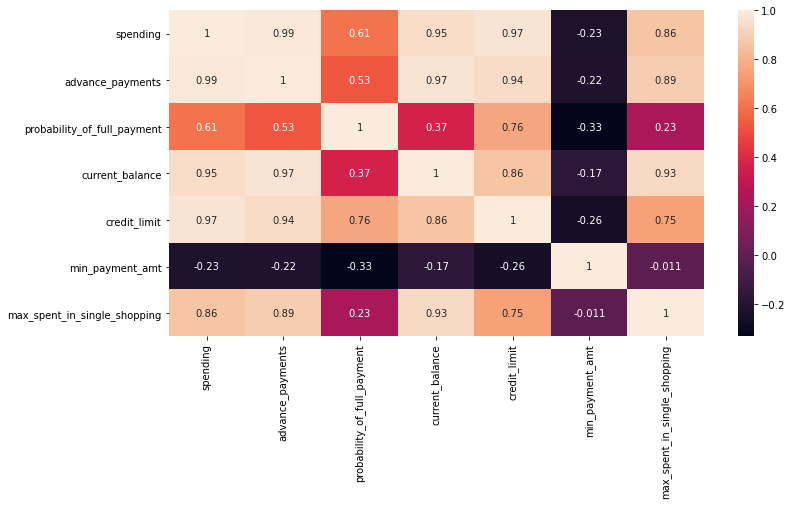

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(bank_df.corr(),annot=True)

##### Insights from heat map and correlation data:
* Highly correlated are 
  * 'spending' and 'advance_payments'
  * 'spending' and 'current_balance'
  * 'spending' and 'credit_limit'
  * 'advance_payments' and 'current_balance'
  * 'advance_payments' and  'credit_limit'
  * 'current_balance' and 'max_spent_in_single_shopping'
* Slight Negative correlation exists between
  * 'min_payment_amt' and 'probability_of_full_payment'


## 1.2 Is scaling necessary for clustering in this case?.

#### Getting the variances and means for all variables

In [12]:
np.round(bank_df.var(),2)

spending                        8.47
advance_payments                1.71
probability_of_full_payment     0.00
current_balance                 0.20
credit_limit                    0.14
min_payment_amt                 2.26
max_spent_in_single_shopping    0.24
dtype: float64

In [13]:
np.round(bank_df.mean(),2)

spending                        14.85
advance_payments                14.56
probability_of_full_payment      0.87
current_balance                  5.63
credit_limit                     3.26
min_payment_amt                  3.70
max_spent_in_single_shopping     5.41
dtype: float64

##### From the above , it is clear that there is a significant differenecs between the variances and means of variables. 
* So, the scaling is necessary to avoid the dominating effect of high valued variables.
* StandardScaler method will be used for scaling where in each feature, the subsequent mean will be subtracted from values and divided by standard deviation.

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
X= StandardScaler()
scaled_bank_df= X.fit_transform(bank_df)


## 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [17]:
HClust = linkage(scaled_bank_df, method = 'ward')

#### Non truncated dendogram

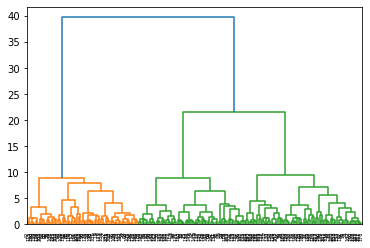

In [18]:
dend = dendrogram(HClust)

#### Truncated dendogram with last 20 merges

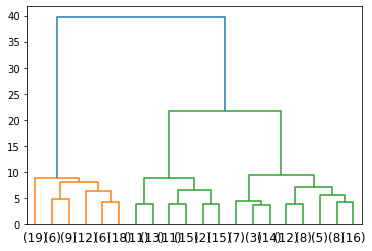

In [19]:
dend = dendrogram(HClust,truncate_mode='lastp',p = 20)

* From above dendogram it is clear that the distance after 10 is high between the records.
* We know that in a dendogram greater the difference in height, the more dissimilarity. 
* Below the distance 10 the distance between records is less.
* So, the optimum number of clusters shall be three.

In [20]:
from scipy.cluster.hierarchy import fcluster

* Using 'maxclust' criterion for clustering

In [21]:
clusters_1 = fcluster(HClust, 3, criterion='maxclust')
clusters_1

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

* Using 'distance' criterion for clustering

In [22]:
clusters_2 = fcluster(HClust, 12, criterion='distance')
clusters_2

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

* Checking whether the number of clusters generated by the 'maxclust' criterion is same as the number of clusters generated by the 'distance' criterion.

In [23]:
np.array_equal(clusters_1,clusters_2)

True

#### Breifing ;
* We used Fcluster method for clustering
* Both "maxclust" and "distance" criterion are used seperately to get 3 clusters.
* The linkage method used is 'ward' which uses the variance minimization algorithm.
* The distance are measured using "Euclidean method " in this algorithm.

#### Getting clusters in original dataframe

In [24]:
bank_df_Hclustering= bank_df
bank_df_Hclustering['clusters'] = clusters_1

In [25]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


#### Exporting the dataframe created with the clusters into a csv file

In [26]:
bank_df.to_csv('bank_df_Cluster.csv')

#### Getting box plots between "clusters" and all the other variables

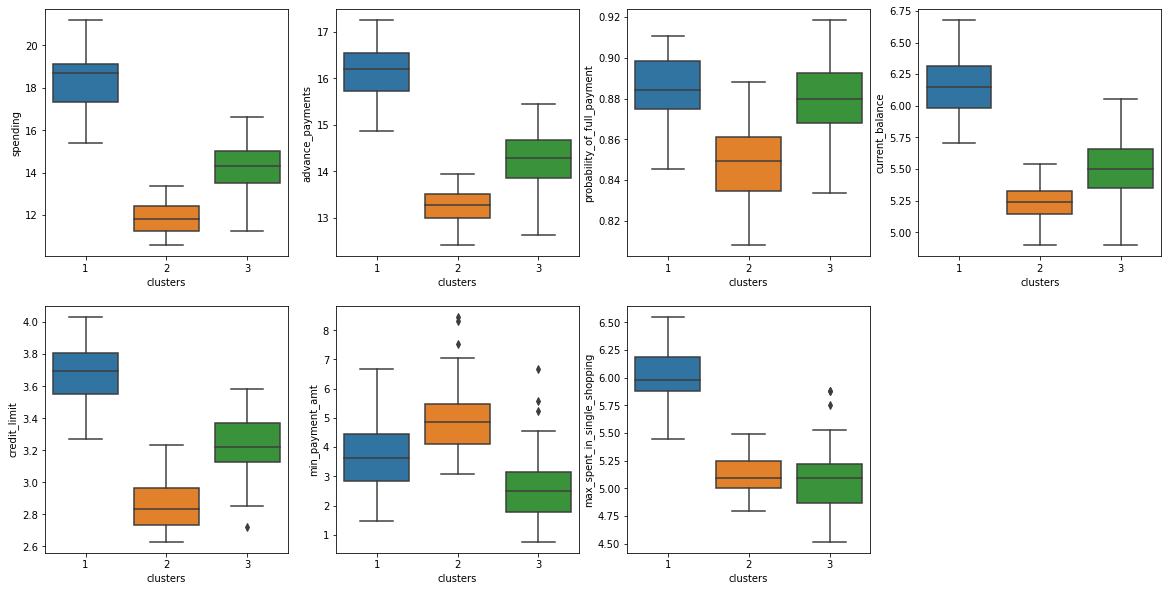

In [27]:
plt.figure(figsize = (20,10))
plt.title('Boxplots "H_clusters" and all the other variables')
plt.subplot(2, 4, 1)
sns.boxplot(x="clusters", y="spending",data=bank_df)

plt.subplot(2, 4, 2)
sns.boxplot(x="clusters", y="advance_payments",data=bank_df)

plt.subplot(2, 4, 3)
sns.boxplot(x="clusters", y="probability_of_full_payment",data=bank_df)

plt.subplot(2, 4, 4)
sns.boxplot(x="clusters", y="current_balance",data=bank_df)

plt.subplot(2, 4, 5)
sns.boxplot(x="clusters", y="credit_limit",data=bank_df)

plt.subplot(2, 4, 6)
sns.boxplot(x="clusters", y="min_payment_amt",data=bank_df)

plt.subplot(2, 4, 7)
sns.boxplot(x="clusters", y="max_spent_in_single_shopping",data=bank_df)

#### Insights from above 
* Cluster 1 is with higher values of all variable except "min_payment_amt" as compared to other clusters. Thus, Cluster 1 can be segmented as the best customer segment or may be the upper class customers with high income and high expenditures with payments ontime.
* Cluster 3 is with intermediate values except for "min_payment_amt" and "max_spent_in_single_shopping". Thus, Cluster 3 can be segmented as the middle class customers. The bank may offer some promotional offers to this segment to increase "max_spent_in_single_shopping". 
* Cluster 2 is with lowest values of all variables except "min_payment_amt". This is the segment of customers which may be grouped in the class with low income and thus low expenditures class. As the "probability_of_full_payment" is lowest for this class so bank should be cautious about increasing there credit limits.

## 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters

In [28]:
from sklearn.cluster import KMeans 

#### Performing K-Means clustering on scaled dat with 3 clusters

In [29]:
k_means3 = KMeans(n_clusters = 3)
k_means3.fit(scaled_bank_df)
k_means3.inertia_

430.6589731513006

#### Within Sum of Squares (WSS) for 2 to 10 clusters.

In [30]:
wss =[] 

In [31]:
for i in range(1,15):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_bank_df)
    wss.append(KM.inertia_)

In [32]:
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.2834476674333,
 328.21750906266806,
 289.24573672030135,
 262.31061151991236,
 240.9789853551736,
 223.0571030438903,
 206.39124617166334,
 194.0496719763343,
 181.80656253136345,
 174.58739492764832,
 164.30825146980163]

#### Plotting the Within Sum of Squares (WSS) plot using the values of 'inertia' (elbow curve)

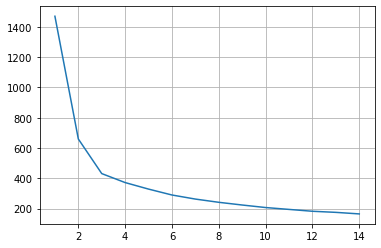

In [33]:
plt.plot(range(1,15), wss)
plt.grid()
plt.show()

* From above wss records and elbow graph it is clear that the major decline in wss is till the value 3. So the optimum number of clusters is 3.

#### Getting silhouette score for 3 clusters

In [34]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [35]:
labels = k_means3.labels_

In [36]:
print("Silhouette score using 3 clusters is", silhouette_score(scaled_bank_df,labels))

Silhouette score using 3 clusters is 0.4007270552751299


#### As the silhouette score is close to +1 , we can say that the clusters are well separated from each other on an average.

#### Appending cluster labels obtained from K-means clustering into the original data frame. 

In [37]:
bank_df_Kmeans= bank_df.drop("clusters", axis=1)
bank_df_Kmeans["K-Means clusters"] = labels
bank_df_Kmeans.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,K-Means clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,2


## 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

#### Getting box plots between "clusters" and all the other variables

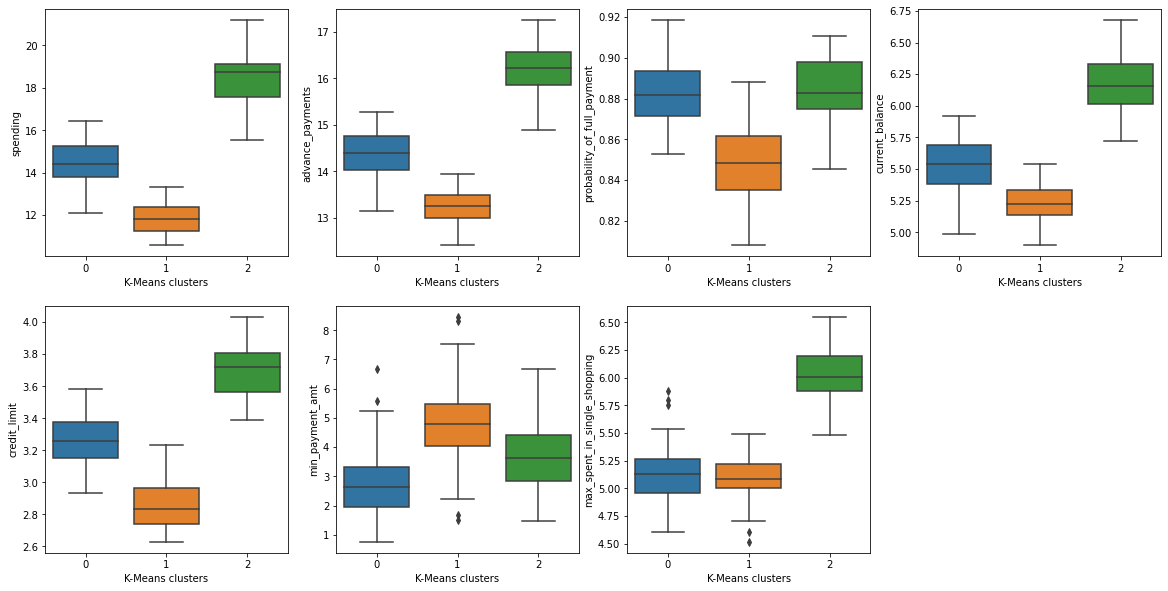

In [38]:
plt.figure(figsize = (20,10))
plt.subplot(2, 4, 1)
sns.boxplot(x="K-Means clusters", y="spending",data=bank_df_Kmeans)

plt.subplot(2, 4, 2)
sns.boxplot(x="K-Means clusters", y="advance_payments",data=bank_df_Kmeans)

plt.subplot(2, 4, 3)
sns.boxplot(x="K-Means clusters", y="probability_of_full_payment",data=bank_df_Kmeans)

plt.subplot(2, 4, 4)
sns.boxplot(x="K-Means clusters", y="current_balance",data=bank_df_Kmeans)

plt.subplot(2, 4, 5)
sns.boxplot(x="K-Means clusters", y="credit_limit",data=bank_df_Kmeans)

plt.subplot(2, 4, 6)
sns.boxplot(x="K-Means clusters", y="min_payment_amt",data=bank_df_Kmeans)

plt.subplot(2, 4, 7)
sns.boxplot(x="K-Means clusters", y="max_spent_in_single_shopping",data=bank_df_Kmeans)

#### Insights from above 
* Cluster 2 is with higher values of all variable except "min_payment_amt" as compared to other clusters. Thus, Cluster 2 can be segmented as the best customer segment or may be the upper class customers with high income and high expenditures with payments ontime.
* Cluster 0 is with intermediate values except for "min_payment_amt" . Thus, Cluster 0 can be segmented as the middle class customers. The bank may offer some promotional offers to this segment to increase "max_spent_in_single_shopping". As the "probability_of_full_payment" for cluster 0 is nearly equal to Cluster 2, so the cluster 0 is most important segment to be focused and for promotional activities.
* Cluster 1 is with lowest values of all variables except "min_payment_amt". This is the segment of customers which may be grouped in the class with low income and thus low expenditures class. As the "probability_of_full_payment"  is lowest for this class so bank should be cautious about increasing there credit limits.
* Bank may focus to increase the "probability_of_full_payment" for cluster 1 and then on other variablesfor this segment.
##### From above it is clear that the bank should focus on cluster 0 segment of customers for promotional activities and work to move them in cluster 2 segment.

# Problem 2: CART-RF-ANN

## 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [39]:
insurance_df= pd.read_csv("insurance_part2_data.csv")

In [40]:
insurance_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [41]:
insurance_df.duplicated().sum()

139

In [42]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


#### Reading the data
* 139 duplicate rows are present whcih may be dropped as the dataset has enough entries.
* There are 3000 rows and 10 columns in dataset.
* The data type are int, float and object type.
* No null value present in dataset.
* Object data types required to be converted to categorical



#### Dropping the duplicate rows

In [43]:
insurance_df.drop_duplicates(subset=None, keep='first', inplace=True)

In [44]:
insurance_df.duplicated().sum()

0

#### Checking for unique values of variables (To get information of any serial numbers/unique ID type of column)

In [45]:
print("The unique values of variables are \n",insurance_df.nunique())

The unique values of variables are 
 Age              70
Agency_Code       4
Type              2
Claimed           2
Commision       324
Channel           2
Duration        257
Sales           380
Product Name      5
Destination       3
dtype: int64


* No coulmn reflects the serial number/unique id type data, which would otherwised be dropped.

#### Getting statistical information

In [46]:
insurance_df.describe()

,Age,Commision,Duration,Sales
count,2861.000000,2861.000000,2861.000000,2861.000000
mean,38.204124,15.080996,72.120238,61.757878
std,10.678106,25.826834,135.977200,71.399740
min,8.000000,0.000000,-1.000000,0.000000
25%,31.000000,0.000000,12.000000,20.000000
50%,36.000000,5.630000,28.000000,33.500000
75%,43.000000,17.820000,66.000000,69.300000
max,84.000000,210.210000,4580.000000,539.000000


* The minimum value in duration is neagtive which seems to be not proper.
Lets check that;

In [47]:
insurance_df[insurance_df["Duration"]==-1]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,JZI,Airlines,No,6.3,Online,-1,18.0,Bronze Plan,ASIA


* We need to remove this row.

In [48]:
insurance_df.drop(labels=[1508], axis=0, inplace=True)

In [49]:
insurance_df[insurance_df["Duration"]==-1]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination


##### Getting box plots

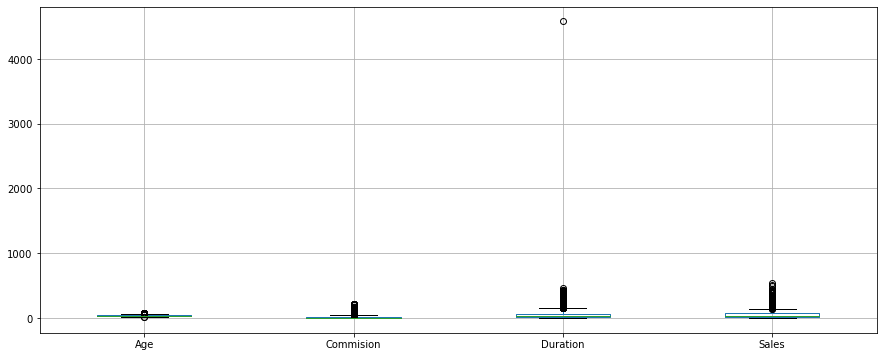

In [50]:
plt.figure(figsize=(15,6))
insurance_df.boxplot()

* Outliers are present.
* An extreme value can be seen in "Duration". This can be removed after checking with the customer.

#### Getting pairplots

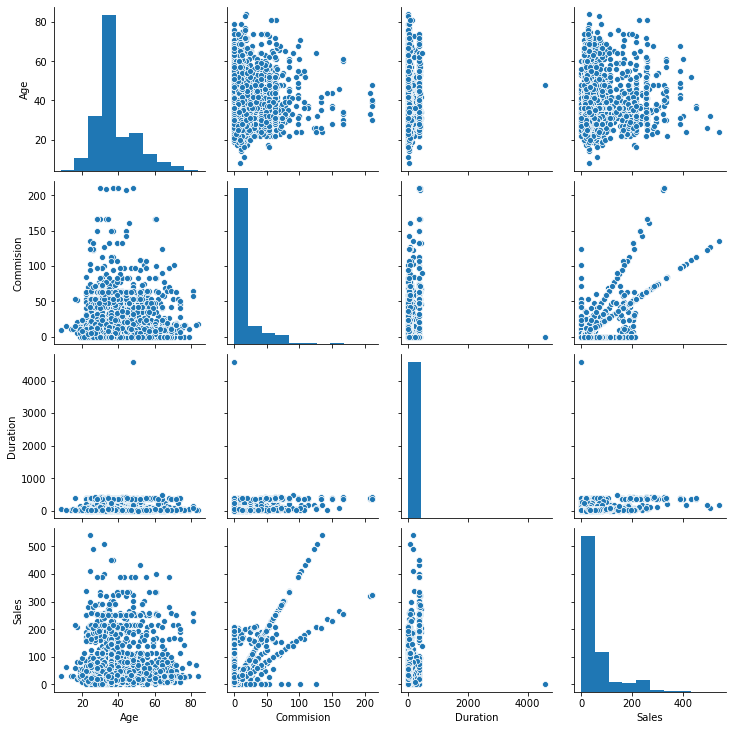

In [51]:
sns.pairplot(insurance_df)

* It seems that variables "Commision" and "Sales" are correlated, which is obvious.

#### Converting the object data types to categorical

In [52]:
for feature in insurance_df.columns: 
    if insurance_df[feature].dtype == 'object': 
        insurance_df[feature] = pd.Categorical(insurance_df[feature]).codes

In [53]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2860 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2860 non-null   int64  
 1   Agency_Code   2860 non-null   int8   
 2   Type          2860 non-null   int8   
 3   Claimed       2860 non-null   int8   
 4   Commision     2860 non-null   float64
 5   Channel       2860 non-null   int8   
 6   Duration      2860 non-null   int64  
 7   Sales         2860 non-null   float64
 8   Product Name  2860 non-null   int8   
 9   Destination   2860 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 208.5 KB


* All the variables are now either int of float type

## 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [54]:
X = insurance_df.drop("Claimed" , axis=1)

y = insurance_df.pop("Claimed")

In [149]:
from sklearn.model_selection import train_test_split

X_train_CART, X_test_CART, train_labels_CART, test_labels_CART = train_test_split(X, y, test_size=.30, random_state=1)
X_train_RF, X_test_RF, train_labels_RF, test_labels_RF = train_test_split(X, y, test_size=.30, random_state=1)
X_train_ANN, X_test_ANN, train_labels_ANN, test_labels_ANN = train_test_split(X, y, test_size=.30, random_state=1)

* The data is splitted in the ratio of 70:30 for Training and Testing
* The random state is choosen as 1.

### Classification model CART

In [153]:
from sklearn.tree import DecisionTreeClassifier

In [161]:
dt_model_CART = DecisionTreeClassifier(criterion = 'gini' )

In [162]:
dt_model_CART.fit(X_train_CART, train_labels_CART)

DecisionTreeClassifier()

In [168]:
from sklearn.model_selection import GridSearchCV

param_grid_CART = {
    'max_depth': [4,5,6],
    'min_samples_leaf': [25,30,35,40],
    'min_samples_split': [15,20,25]
}

dt_model = DecisionTreeClassifier(random_state=1)

grid_search_CART = GridSearchCV(estimator = dt_model_CART, param_grid = param_grid_CART, cv = 10)

In [169]:
grid_search_CART.fit(X_train_CART, train_labels_CART)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6],
                         'min_samples_leaf': [25, 30, 35, 40],
                         'min_samples_split': [15, 20, 25]})

In [170]:
grid_search_CART.best_params_

{'max_depth': 4, 'min_samples_leaf': 30, 'min_samples_split': 15}

In [171]:
best_grid_CART = grid_search_CART.best_estimator_
best_grid_CART

DecisionTreeClassifier(max_depth=4, min_samples_leaf=30, min_samples_split=15)

##### Predicting on Training and Test dataset

In [172]:
ytrain_predict_CART = best_grid_CART.predict(X_train_CART)
ytest_predict_CART = best_grid_CART.predict(X_test_CART)

### Random Forest 

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [174]:
#from sklearn.model_selection import GridSearchCV
param_grid_RF = {
    'max_depth': [10,20],
    'max_features': [6,7],
    'min_samples_leaf': [10,50],
    'min_samples_split': [50,100],
    'n_estimators': [100,200],
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_RF = GridSearchCV(estimator = rfcl, param_grid = param_grid_RF, cv = 5)

In [175]:
grid_search_RF.fit(X_train_RF, train_labels_RF)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10, 20], 'max_features': [6, 7],
                         'min_samples_leaf': [10, 50],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 200]})

In [176]:
grid_search_RF.best_params_

{'max_depth': 20,
 'max_features': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 200}

In [177]:
best_grid_RF = grid_search_RF.best_estimator_
best_grid_RF

RandomForestClassifier(max_depth=20, max_features=6, min_samples_leaf=10,
                       min_samples_split=50, n_estimators=200, random_state=1)

##### Predicting on Training and Test dataset

In [178]:
ytrain_predict_RF = best_grid_RF.predict(X_train_RF)
ytest_predict_RF = best_grid_RF.predict(X_test_RF)

### Artificial Neural Network

In [143]:
from sklearn.neural_network import MLPClassifier

In [179]:
param_grid_ANN = {
    'hidden_layer_sizes': [50,100],
    'max_iter': [2500,5000],
    'solver': ['adam'], 
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search_ANN = GridSearchCV(estimator = nncl, param_grid = param_grid_ANN, cv = 10)

In [180]:
grid_search_ANN.fit(X_train_ANN, train_labels_ANN)
grid_search_ANN.best_params_

{'hidden_layer_sizes': 50, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [181]:
best_grid_ANN = grid_search_ANN.best_estimator_
best_grid_ANN

MLPClassifier(hidden_layer_sizes=50, max_iter=2500, random_state=1, tol=0.01)

##### Predicting on Training and Test dataset

In [182]:
ytrain_predict_ANN = best_grid_ANN.predict(X_train_ANN)
ytest_predict_ANN = best_grid_ANN.predict(X_test_ANN)

## 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

### Performance Metrics for CART

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

#### Classification Report for CART Model

In [183]:
print(classification_report(train_labels_CART, ytrain_predict_CART))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1343
           1       0.70      0.59      0.64       659

    accuracy                           0.78      2002
   macro avg       0.76      0.73      0.74      2002
weighted avg       0.78      0.78      0.78      2002



#### Confusion Matrix for CART Model

In [186]:
confusion_matrix(train_labels_CART,ytrain_predict_CART)

array([[1174,  169],
       [ 268,  391]], dtype=int64)

#### Accuracy for train data

In [225]:
cart_train_acc=best_grid_CART.score(X_train_CART,train_labels_CART) 
cart_train_acc

0.7817182817182817

#### Accuracy for test data

In [226]:
cart_test_acc=best_grid_CART.score(X_test_CART,test_labels_CART) 
cart_test_acc

0.7715617715617715

#### AUC and ROC for training data

In [190]:
from sklearn.metrics import roc_curve,roc_auc_score

AUC: 0.812


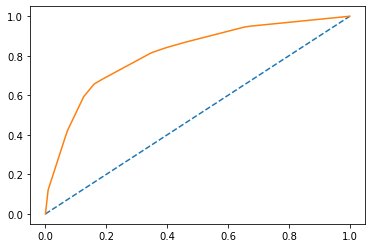

In [191]:
probs = best_grid_CART.predict_proba(X_train_CART)
probs = probs[:, 1]
cart_train_auc = roc_auc_score(train_labels_CART, probs)
print('AUC: %.3f' % cart_train_auc)
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels_CART, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr)

#### AUC and ROC for the test data

AUC: 0.795


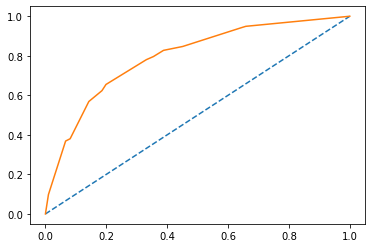

In [192]:
probs = best_grid_CART.predict_proba(X_test_CART)
probs = probs[:, 1]
cart_test_auc = roc_auc_score(test_labels_CART, probs)
print('AUC: %.3f' % cart_test_auc)
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels_CART, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr)

#### Precision, Recall and f1-score for Train Data

In [197]:
cart_metrics=classification_report(train_labels_CART, ytrain_predict_CART,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.7
cart_train_recall  0.59
cart_train_f1  0.64


#### Precision, Recall and f1-score for Test Data

In [204]:
cart_metrics=classification_report(test_labels_CART, ytest_predict_CART,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.63
cart_test_recall  0.57
cart_test_f1  0.6


### Performance Metrics for Random Forest

#### Classification Report for Random Forest

In [199]:
print(classification_report(train_labels_RF,ytrain_predict_RF))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1343
           1       0.74      0.64      0.68       659

    accuracy                           0.80      2002
   macro avg       0.78      0.76      0.77      2002
weighted avg       0.80      0.80      0.80      2002



#### Confusion Matrix for Random Forest

In [187]:
confusion_matrix(train_labels_RF,ytrain_predict_RF)

array([[1192,  151],
       [ 240,  419]], dtype=int64)

####  Accuracy for train data

In [224]:
rf_train_acc=best_grid_RF.score(X_train_RF,train_labels_RF)
rf_train_acc

0.8046953046953047

####  Accuracy for test data

In [221]:
rf_test_acc=best_grid_RF.score(X_test_RF,test_labels_RF)
rf_test_acc

0.7773892773892774

#### AUC and ROC for training data

Area under Curve is 0.8685812005599766


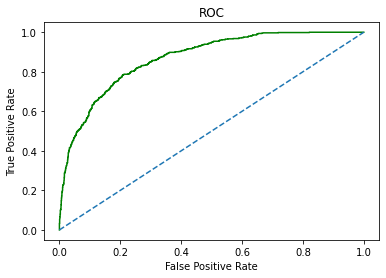

In [202]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels_RF,best_grid_RF.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels_RF,best_grid_RF.predict_proba(X_train_RF)[:,1])
print('Area under Curve is', rf_train_auc)

#### AUC and ROC for training data

Area under Curve is 0.8088511689916431


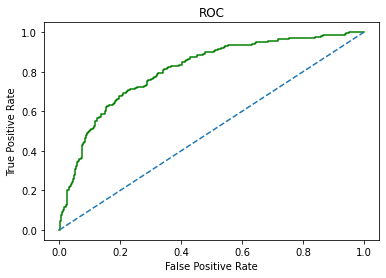

In [210]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels_RF,best_grid_RF.predict_proba(X_test_RF)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels_RF,best_grid_RF.predict_proba(X_test_RF)[:,1])
print('Area under Curve is', rf_test_auc)

#### Precision, Recall and f1-score for train data

In [211]:
rf_metrics=classification_report(train_labels_RF, ytrain_predict_RF,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.74
rf_train_recall  0.64
rf_train_f1  0.68


#### Precision, Recall and f1-score for test data

In [212]:
rf_metrics=classification_report(test_labels_RF, ytest_predict_RF,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.64
rf_test_recall  0.58
rf_test_f1  0.61


### Performance Metrics for ANN

#### Classification Report for ANN

In [185]:
print(classification_report(train_labels_ANN,ytrain_predict_ANN))

              precision    recall  f1-score   support

           0       0.80      0.88      0.83      1343
           1       0.68      0.54      0.60       659

    accuracy                           0.77      2002
   macro avg       0.74      0.71      0.72      2002
weighted avg       0.76      0.77      0.76      2002



#### Confusion Matrix for ANN

In [188]:
confusion_matrix(train_labels_ANN,ytrain_predict_ANN)

array([[1178,  165],
       [ 303,  356]], dtype=int64)

#### Accuracy for train data

In [222]:
nn_train_acc=best_grid_ANN.score(X_train_ANN,train_labels_ANN)
nn_train_acc

0.7662337662337663

#### Accuracy for train data

In [223]:
nn_test_acc=best_grid_ANN.score(X_test_ANN,test_labels_ANN)
nn_test_acc

0.7668997668997669

#### AUC and ROC for training data


Area under Curve is 0.7898449443356607


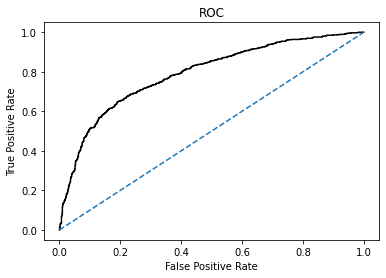

In [213]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels_ANN,best_grid_ANN.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels_ANN,best_grid_ANN.predict_proba(X_train_ANN)[:,1])
print('Area under Curve is', nn_train_auc)

#### AUC and ROC for test data

Area under Curve is 0.7726985985107144


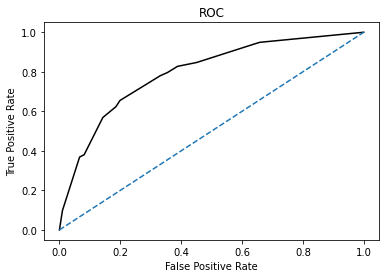

In [214]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels_ANN,best_grid.predict_proba(X_test_ANN)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels_ANN,best_grid_ANN.predict_proba(X_test_ANN)[:,1])
print('Area under Curve is', nn_test_auc)

#### Precision, Recall and f1-score for train data

In [216]:
nn_metrics=classification_report(train_labels_ANN, ytrain_predict_ANN,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.68
nn_train_recall  0.54
nn_train_f1  0.6


#### Precision, Recall and f1-score for test data

In [215]:
nn_metrics=classification_report(test_labels_ANN, ytest_predict_ANN,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.63
nn_test_recall  0.53
nn_test_f1  0.57


## 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

#### Comparison of the performance metrics from the 3 models

In [227]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.78,0.77,0.80,0.78,0.77,0.77
AUC,0.81,0.79,0.87,0.81,0.79,0.77
Recall,0.59,0.57,0.64,0.58,0.54,0.53
Precision,0.70,0.63,0.74,0.64,0.68,0.63
F1 Score,0.64,0.60,0.68,0.61,0.60,0.57


#### ROC Curve for the 3 models on the Training data

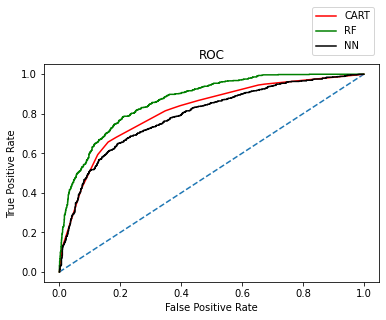

In [228]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

#### ROC Curve for the 3 models on the Test data

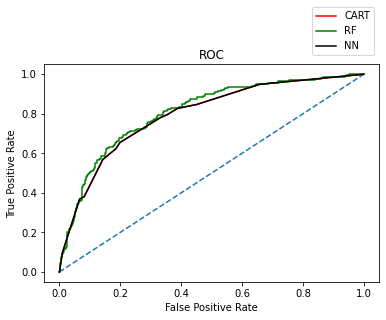

In [229]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## 2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

#### Getting feature importance for CART model

In [230]:
print (pd.DataFrame(best_grid_CART.feature_importances_, columns = ["Imp"], index = X_train_CART.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.594018
Sales         0.274412
Commision     0.052039
Product Name  0.042701
Destination   0.027145
Duration      0.009686
Age           0.000000
Type          0.000000
Channel       0.000000


#### Getting feature importance for RF model

In [231]:
print (pd.DataFrame(best_grid_RF.feature_importances_, columns = ["Imp"], index = X_train_RF.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.331068
Sales         0.207335
Product Name  0.170860
Duration      0.102241
Commision     0.082494
Age           0.065718
Type          0.020026
Destination   0.017411
Channel       0.002848


#### Inferences;
* Accuracy, AUC, Recall, Precision and F-1 score is best for Random Forest Model.
* The feature "Agency_code" is the most important one in both CART and Random Forest models. Hence, the insurance firm should keep a check on tour firms during claims.
* The insurance firm may also cluster/segment the tour firms("Agency_code") depending on the claims made.
* The next important feature is "Sales". Thus, the amount of sales of tour insurance policies is also a factor which may help in predicting the calims.
* So finally, the Random Forest Model completes the task to make a model which predicts the claim status. The recommendations to management is provided to keep check on various tour firms and Amount of sales of tour insurance policies, as these are most important features for prediction.


# Thanks!!!